In [1]:
%matplotlib inline

# Read training set

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import rankdata

In [3]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.22.2.post1.


In [4]:
def rank_normalizer(X):
    return(X.rank(axis=1)/X.shape[1])
def zscore(X):
    return((X - X.mean(axis=0))/X.std(axis=0))

In [5]:
neg = pd.read_csv("spectrum_avg_norm.csv",index_col=0).iloc[:3,:]
#neg = pd.concat((neg,pd.read_csv("feuille_spectrum_avg_norm.csv",index_col=0)))
neg = neg.iloc[np.random.randint(0,3,300),:]
neg += np.random.randn(*neg.shape)*0.01
print(neg.iloc[:,1])

Ble        0.250400
Feve       0.372069
Lumiere    0.269899
Feve       0.363246
Feve       0.370820
             ...   
Ble        0.252378
Ble        0.255726
Feve       0.377310
Ble        0.238959
Feve       0.364244
Name: 398.32, Length: 300, dtype: float64


In [6]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])
X_species_leave = X.copy()
X_species_leave.index = X_species_leave.index.droplevel(2)
X_species_leave = X_species_leave.groupby(X_species_leave.index).mean()

In [7]:
X_zscore = zscore(X.T).T
X_species_leave_zscore = zscore(X_species_leave.T).T
neg_zscore = zscore(neg.T).T

X_rank = rank_normalizer(X)
X_species_leave_rank = rank_normalizer(X_species_leave)
neg_rank = rank_normalizer(neg)

In [8]:
#neg.T
X_species_leave.T
#X.T

,"(False, N)","(False, R)","(False, V)","(True, N)","(True, R)","(True, V)"
397.01,0.729442,0.775681,0.717112,0.640480,0.541644,0.516844
398.32,0.701605,0.734126,0.666406,0.610002,0.504123,0.488405
399.63,0.694265,0.728700,0.665044,0.604746,0.497003,0.480001
400.93,0.682743,0.720476,0.660099,0.595168,0.477834,0.468745
402.24,0.686792,0.709449,0.631949,0.551507,0.464780,0.431684
...,...,...,...,...,...,...
998.88,0.716277,0.749894,0.738697,0.712527,0.716583,0.725457
1000.29,0.722876,0.754128,0.743881,0.716673,0.720356,0.728864
1001.7,0.724178,0.756396,0.743608,0.716750,0.722677,0.734085
1003.11,0.723809,0.757686,0.743828,0.723805,0.725300,0.734908


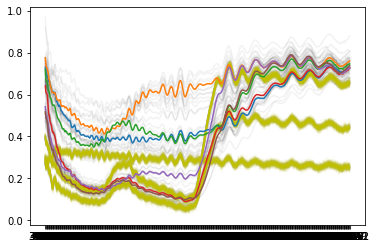

In [9]:
# X.T : pucerons sur feuille ou non avec plusieurs espèces 
#(gris sur le graphe)
_=plt.plot(X.T,"k-", alpha=0.05)

# neg.T : randomisé avec erreur sigma pour chaque longueur d'onde: feuille fève, blé ou lumière seule
# trois trucs dégueu en vert kaka
_=plt.plot(neg.T,"y",alpha=0.03)

# X_species_leave : 6 conditions : 3 Feuille ou non -> 3 espèces :
# trois petites courbes colorées
_=plt.plot(X_species_leave.T)


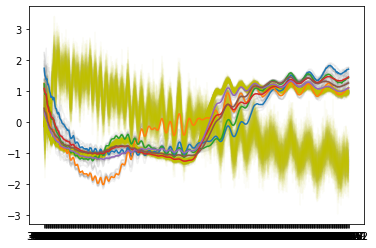

In [10]:
_=plt.plot(X_zscore.T,"k-", alpha=0.05)
_=plt.plot(neg_zscore.T,"y",alpha=0.03)
_=plt.plot(X_species_leave_zscore.T)

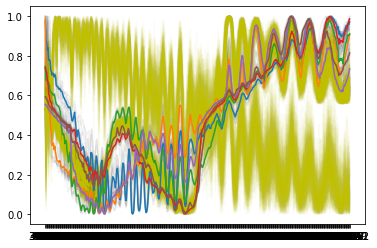

In [11]:
_=plt.plot(X_rank.T,"k-", alpha=0.05)
_=plt.plot(neg_rank.T,"y",alpha=0.03)
_=plt.plot(X_species_leave_rank.T)

In [12]:
X_full = pd.concat((X,neg))
X_full_zscore = pd.concat((X_zscore,neg_zscore))
X_full_rank = pd.concat((X_rank,neg_rank))

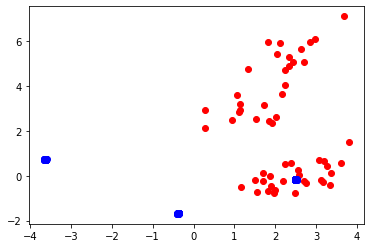

In [13]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [14]:
np.cumsum(pca.explained_variance_ratio_)

array([0.69511566, 0.96266534])

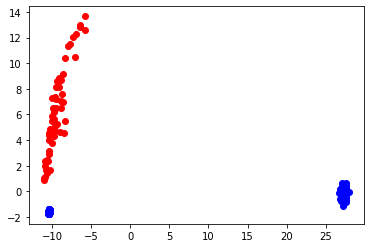

In [15]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full_zscore)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [16]:
np.cumsum(pca.explained_variance_ratio_)

array([0.88933698, 0.92002685])

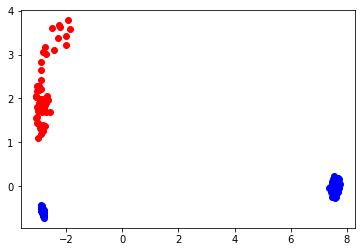

In [17]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_full_pca = pca.fit_transform(X_full_rank)
plt.plot(X_full_pca[:X.shape[0],0],X_full_pca[:X.shape[0],1],"or")
plt.plot(X_full_pca[X.shape[0]:,0],X_full_pca[X.shape[0]:,1],"ob")

In [18]:
np.cumsum(pca.explained_variance_ratio_)

array([0.85037131, 0.88930379])

# Remarques
Aphids spectra are mainly depends on : 1) the aphid is on a leave 2) the species.
Therefore if we take as dataset the average spectra for 3 species of aphids on leaves and on white screen, we should be able to detect an aphid by computing the difference wrt to the dataset

More differences between the negative examples and the aphids appear when no standardization is applied

In [19]:
def best_match(datapoint, library=X_species_leave):
    distance = np.sum(np.abs(library - datapoint),axis=1)
    return(min(distance))

In [20]:
best_match_distance = X_full.apply(best_match,axis=1)

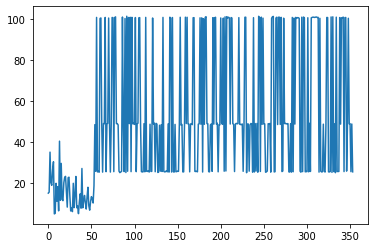

In [21]:
plt.plot(best_match_distance.values)

# Autoencoder

In [22]:
X.min().min(), X.max().max()

(0.06839674514740264, 0.9686257891639752)

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 448)]        0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 448)          201152      input_1[0][0]                    
__________________________________________________________________________________________________
reshape (Reshape)               (None, 448, 1)       0           dense[0][0]                      
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 224, 32)      128         reshape[0][0]                    
____________________________________________________________________________________________

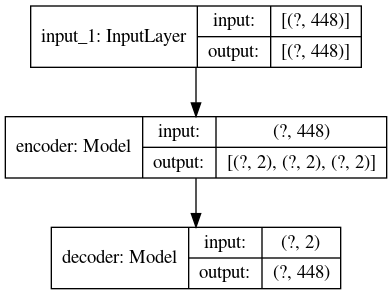

In [23]:
from keras.layers import Input, Dense, Conv1D, Conv2DTranspose,Lambda,Flatten,Reshape
from keras.models import Model
import pandas as pd
import numpy as np
from keras import regularizers
from keras import backend as K
from keras.utils import plot_model


def sampling(args):
    """Reparameterization trick by sampling from an isotropic unit Gaussian.
    # Arguments
        args (tensor): mean and log of variance of Q(z|X)
    # Returns
        z (tensor): sampled latent vector
    """

    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon



def Conv1DTranspose(input_tensor, filters, kernel_size, strides=2, padding='same', activation="relu"):
    """
        input_tensor: tensor, with the shape (batch_size, time_steps, dims)
        filters: int, output dimension, i.e. the output tensor will have the shape of (batch_size, time_steps, filters)
        kernel_size: int, size of the convolution kernel
        strides: int, convolution step size
        padding: 'same' | 'valid'
    """
    x = Lambda(lambda x: K.expand_dims(x, axis=2))(input_tensor)
    x = Conv2DTranspose(filters=filters, kernel_size=(kernel_size, 1), strides=(strides, 1), padding=padding,activation=activation)(x)
    x = Lambda(lambda x: K.squeeze(x, axis=2))(x)
    return x


latent_dim = 2 
inputs = Input(shape=(448,))
x = Dense(448, activation='relu')(inputs)
x = Reshape((448,1, ))(x)
filters = 16
kernel_size=3
for i in range(2):
    filters *= 2
    x = Conv1D(filters,
               kernel_size,
               padding='same',
               activation='relu',
               strides=2)(x)
shape = K.int_shape(x)
x = Flatten()(x)
x = Dense(16, activation='relu')(x)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

# use reparameterization trick to push the sampling out as input
# note that "output_shape" isn't necessary with the TensorFlow backend
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

# instantiate encoder model
encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')
encoder.summary()
plot_model(encoder, to_file='vae_cnn_encoder.png', show_shapes=True)



latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(shape[1] * shape[2], activation='relu')(latent_inputs)
x = Reshape((shape[1], shape[2], ))(x)

for i in range(1):
    x = Conv1DTranspose(input_tensor=x,
                        filters=filters,
                        kernel_size=kernel_size,
                        activation='relu',
                        strides=2,
                        padding='same')
    filters //= 2

outputs = Conv1DTranspose(x,
                          filters=1,
                          kernel_size=kernel_size,
                          activation='sigmoid',
                          padding='same')
outputs = Flatten()(outputs)

# instantiate decoder model
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()
plot_model(decoder, to_file='vae_cnn_decoder.png', show_shapes=True)

# instantiate VAE model
outputs = decoder(encoder(inputs)[2])
vae = Model(inputs, outputs, name='vae')

plot_model(vae, to_file='vae.png', show_shapes=True)


In [24]:
X = pd.read_csv("average_profile_no_outlier.csv",index_col=[0,1,2])
X = X.iloc[np.random.randint(0,X.shape[0],300),:]
X += np.random.randn(*X.shape)*0.01

neg = pd.read_csv("spectrum_avg_norm.csv",index_col=0).iloc[:3,:]
neg = pd.concat((neg,pd.read_csv("feuille_spectrum_avg_norm.csv",index_col=0)))
neg = neg.iloc[np.random.randint(0,3,300),:]
neg += np.random.randn(*neg.shape)*0.01


X_zscore = zscore(X.T).T
X_species_leave_zscore = zscore(X_species_leave.T).T
neg_zscore = zscore(neg.T).T

X_rank = rank_normalizer(X)
X_species_leave_rank = rank_normalizer(X_species_leave)
neg_rank = rank_normalizer(neg)


from sklearn.model_selection import train_test_split
X_full = pd.concat((neg,X))
y = np.asarray(list(np.zeros(neg.shape[0]))+list(np.ones(X.shape[0])))
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
enc.fit(y)
encoded_Y = enc.transform(y)

X_train, X_test, y_train, y_test = train_test_split(X_full, encoded_Y, test_size=0.33, random_state=42)
X

397.01    398.32    399.63    400.93    402.24  \
leave species stage                                                     
True  N       A13    0.628774  0.584648  0.597267  0.568649  0.545156   
      R       A9     0.553954  0.499146  0.532030  0.512392  0.422715   
      N       A13    0.639765  0.611336  0.602727  0.584030  0.507460   
False N       A13    0.726923  0.708371  0.656224  0.682672  0.761088   
True  V       A13    0.472054  0.426082  0.437049  0.418259  0.385835   
...                       ...       ...       ...       ...       ...   
False R       A15    0.776362  0.707536  0.707070  0.696533  0.625133   
True  N       L4     0.609960  0.566935  0.582201  0.574949  0.543800   
              A13    0.613557  0.600211  0.590270  0.584440  0.526878   
      V       A23    0.544332  0.505234  0.544893  0.523074  0.474348   
      R       A23    0.674900  0.630016  0.630920  0.616636  0.558262   

                       403.55    404.86    406.17    407.48    408.79  ...  \
leave species stage                                                    ...   
True  N       A13    0.477327  0.487138  0.491629  0.478624  0.463071  ...   
      R       A9     0.465006  0.413384  0.376757  0.374459  0.363058  ...   
      N       A13    0.497962  0.502044  0.479627  0.459896  0.467616  ...   
False N       A13    0.676922  0.661925  0.651208  0.637391  0.617190  ...   
True  V       A13    0.353230  0.365413  0.360053  0.324366  0.298833  ...   
...                       ...       ...       ...       ...       ...  ...   
False R       A15    0.632130  0.635521  0.596203  0.609480  0.621396  ...   
True  N       L4     0.502824  0.456017  0.431195  0.467470  0.453342  ...   
              A13    0.480944  0.493241  0.494780  0.458897  0.467550  ...   
      V       A23    0.420817  0.423461  0.399050  0.400004  0.363004  ...   
      R       A23    0.535260  0.527424  0.520009  0.494549  0.459822  ...   

                       991.83    993.24    994.65    996.06    997.47  \
leave species stage                                                     
True  N       A13    0.714880  0.709629  0.722699  0.723603  0.740009   
      R       A9     0.755545  0.744552  0.762208  0.749460  0.763264   
      N       A13    0.730638  0.720517  0.704478  0.733583  0.727439   
False N       A13    0.715415  0.753928  0.733747  0.732710  0.729261   
True  V       A13    0.669527  0.688548  0.685168  0.673373  0.671069   
...                       ...       ...       ...       ...       ...   
False R       A15    0.741183  0.719985  0.740849  0.743517  0.755276   
True  N       L4     0.723245  0.700955  0.716184  0.722352  0.719365   
              A13    0.725070  0.711981  0.734563  0.721568  0.743471   
      V       A23    0.735350  0.728801  0.734040  0.741677  0.754540   
      R       A23    0.700802  0.714890  0.701047  0.717611  0.730145   

                       998.88   1000.29    1001.7   1003.11   1004.52  
leave species stage                                                    
True  N       A13    0.729546  0.704993  0.733834  0.717735  0.728022  
      R       A9     0.764142  0.768982  0.771966  0.767664  0.778509  
      N       A13    0.716544  0.733105  0.725467  0.736676  0.739084  
False N       A13    0.752647  0.739680  0.746964  0.766149  0.742683  
True  V       A13    0.694632  0.685134  0.687990  0.682298  0.675088  
...                       ...       ...       ...       ...       ...  
False R       A15    0.738577  0.723704  0.757016  0.744668  0.760831  
True  N       L4     0.711491  0.728163  0.731469  0.727500  0.743372  
              A13    0.718506  0.731146  0.736391  0.740918  0.745406  
      V       A23    0.755302  0.735698  0.726859  0.751877  0.746134  
      R       A23    0.712115  0.717418  0.735076  0.726576  0.746762  

[300 rows x 448 columns]

In [25]:
from keras.losses import mse, binary_crossentropy
reconstruction_loss = mse(K.flatten(inputs), K.flatten(outputs))
reconstruction_loss *= 10*448
kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
kl_loss = K.sum(kl_loss, axis=-1)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='rmsprop')
vae.summary()
#plot_model(vae, to_file='vae_cnn.png', show_shapes=True)
vae.fit(X,
        epochs=250,
        batch_size=4)        
        

Model: "vae"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 448)]        0                                            
__________________________________________________________________________________________________
encoder (Model)                 [(None, 2), (None, 2 322260      input_1[0][0]                    
__________________________________________________________________________________________________
decoder (Model)                 (None, 448)          34049       encoder[1][2]                    
__________________________________________________________________________________________________
dense (Dense)                   (None, 448)          201152      input_1[0][0]                    
________________________________________________________________________________________________

75/75 [==============================] - 0s 3ms/step - loss: 10.2446
Epoch 127/250
75/75 [==============================] - 0s 3ms/step - loss: 10.5385
Epoch 128/250
75/75 [==============================] - 0s 3ms/step - loss: 10.0825
Epoch 129/250
75/75 [==============================] - 0s 3ms/step - loss: 9.9088
Epoch 130/250
75/75 [==============================] - 0s 3ms/step - loss: 10.2898
Epoch 131/250
75/75 [==============================] - 0s 3ms/step - loss: 10.5025
Epoch 132/250
75/75 [==============================] - 0s 3ms/step - loss: 10.5900
Epoch 133/250
75/75 [==============================] - 0s 3ms/step - loss: 10.3350
Epoch 134/250
75/75 [==============================] - 0s 3ms/step - loss: 10.4751
Epoch 135/250
75/75 [==============================] - 0s 3ms/step - loss: 10.1171
Epoch 136/250
75/75 [==============================] - 0s 3ms/step - loss: 10.0920
Epoch 137/250
75/75 [==============================] - 0s 3ms/step - loss: 10.1888
Epoch 138/250
75/75

In [38]:
plt.plot(np.log(vae.history.history["loss"]))
#print(K.flatten(outputs))

KeyError: 'loss'

In [27]:
model = vae
model_json = model.to_json()
with open("model_vae_1Dconv.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_vae_1Dconv.h5")
print("Saved model to disk")

Saved model to disk


In [28]:
decoded_X = vae.predict(X)
decoded_neg = vae.predict(neg)


/home/azurmely/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/home/azurmely/.local/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(0.0, 0.3)

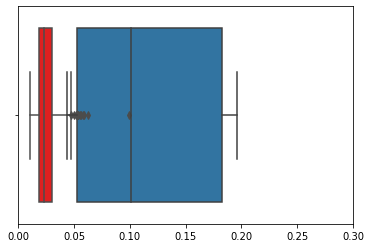

In [29]:
sns.boxplot(np.sqrt(((decoded_X-X)**2)).mean(axis=1),color="red")
sns.boxplot(np.sqrt(((decoded_neg-neg)**2)).mean(axis=1))
plt.xlim(0,0.3)

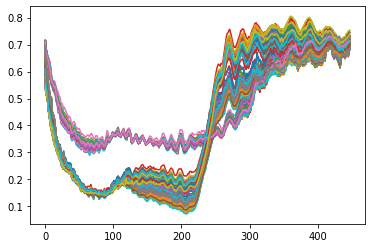

In [30]:
_=plt.plot(decoded_neg.T)


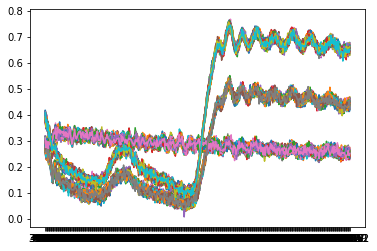

In [31]:
_=plt.plot(neg.T)


(0.0, 1.0)

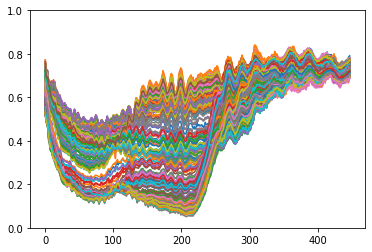

In [32]:
_=plt.plot(decoded_X.T)
plt.ylim([0,1])

(0.0, 1.0)

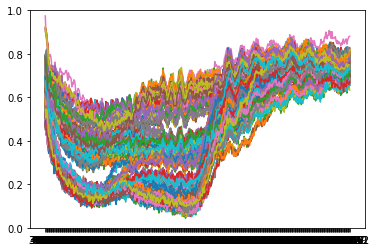

In [33]:
_=plt.plot(X.T)
plt.ylim([0,1])

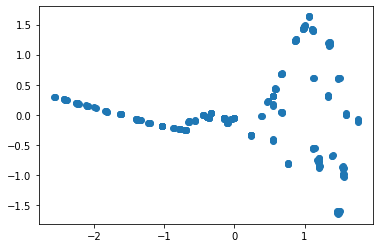

In [34]:
X_enc = encoder.predict(X)[0]
plt.plot(X_enc[:,0],X_enc[:,1],"o")
plt.show()

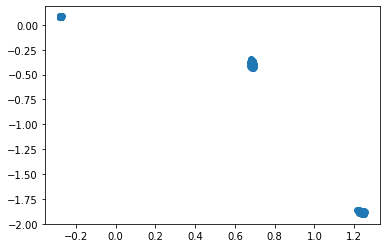

In [35]:
neg_enc = encoder.predict(neg)[0]
plt.plot(neg_enc[:,0],neg_enc[:,1],"o")
plt.show()